In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from direction_field_helper import draw_direction_field

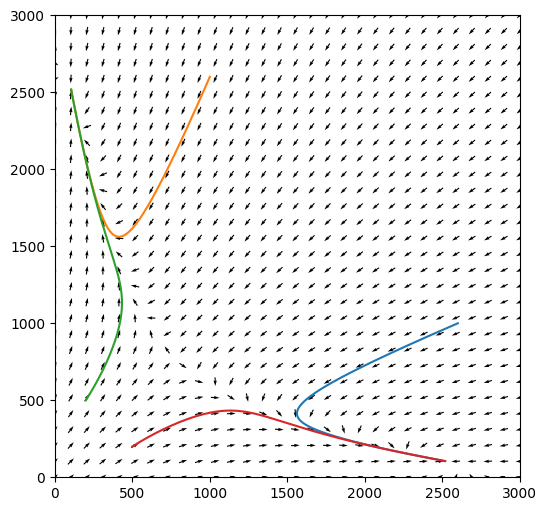

In [6]:
def sdot3(s,t,params):
    PL, PT = s
    vp0L, vpL, vdpL, KL, nL, vp0T, vpT, vdpT, KT, nT = params

    rate_PL_prod =  vp0L + vpL*(KT**nT/(PT**nT+KT**nT))
    rate_PL_loss =  vdpL*PL

    rate_PT_prod = vp0T + vpT*(KL**nL/(PL**nL+KL**nL))
    rate_PT_loss = vdpT*PT
        
    dPL = rate_PL_prod - rate_PL_loss
    dPT = rate_PT_prod - rate_PT_loss
    
    ds = [dPL, dPT]
    return ds

# define parameter values
vp0L = 0.0866
vpL = 43.3
vdpL = 0.0165
KL = 500
nL = 2

vp0T = 0.0866 
vpT = 43.3
vdpT = 0.0165
KT = 500
nT = 2

params = [ vp0L, vpL, vdpL, KL, nL, vp0T, vpT, vdpT, KT, nT ]

# s0       PL    PT
s0_1 = [ 1000 , 2600 ]
s0_2 = [ 2600 , 1000]
s0_3 = [ 500 , 200]
s0_4 = [ 200 , 500] 

s0_vals =  [ s0_1, s0_2, s0_3, s0_4 ]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

for s0 in s0_vals:
    # run simulation with init condition
    t_start = 0
    t_end = 10000
    t_obs = np.arange(t_start, t_end + 0.1, 1)
    s_obs = odeint(sdot3, s0, t_obs, args=(params,))

    # extract results
    PL_obs = s_obs[:,0]
    PT_obs = s_obs[:,1]

    # plot on phase plot
    ax.plot(PT_obs, PL_obs)
    
ax.set_ylim(0,3000)
ax.set_xlim(0,3000)

draw_direction_field(ax,sdot3,params,normalise=True )

# add code to calculate and draw nullclines below: